In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import matplotlib
import seaborn as sns
import numpy as np
import chainer
from chainer import cuda, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

In [15]:
bad = pd.read_json("./log/worst.log").set_index("epoch")[:30]
good = pd.read_json("./log/best.log").set_index("epoch")[:30]


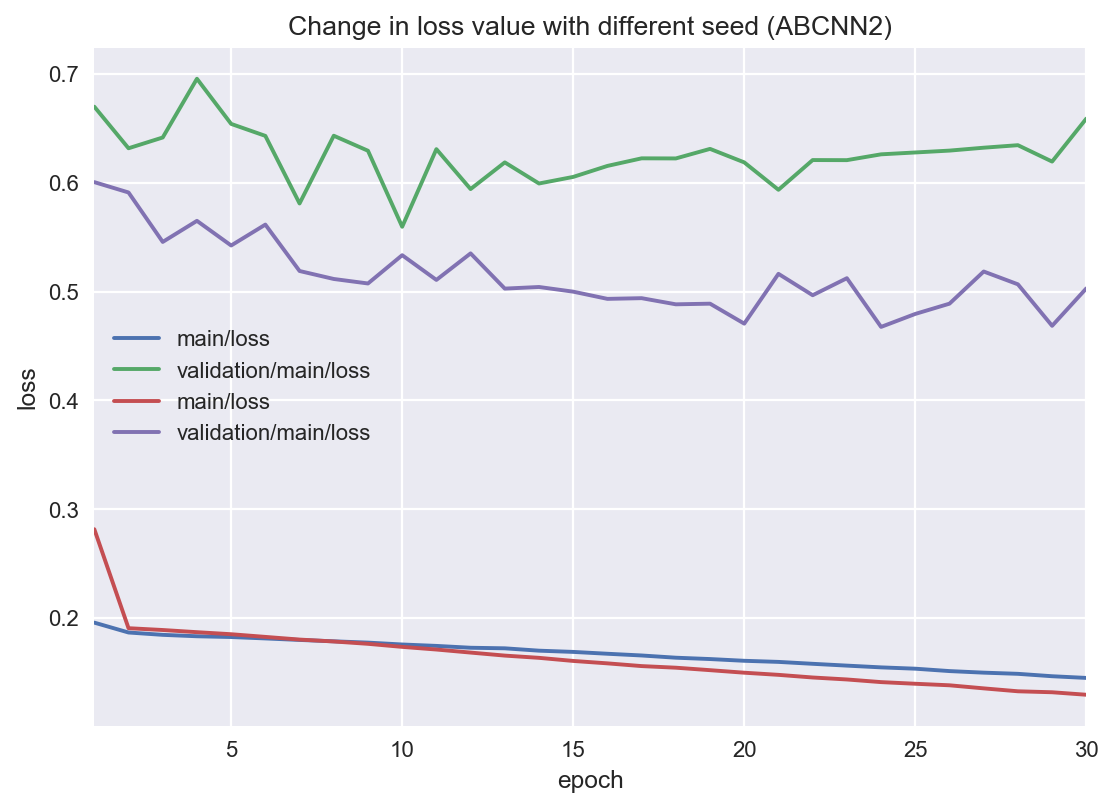

In [25]:
ax = bad[["main/loss", "validation/main/loss"]].plot()
good[["main/loss", "validation/main/loss"]].plot(ax=ax)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Change in loss value with different seed (ABCNN2)")
plt.show()

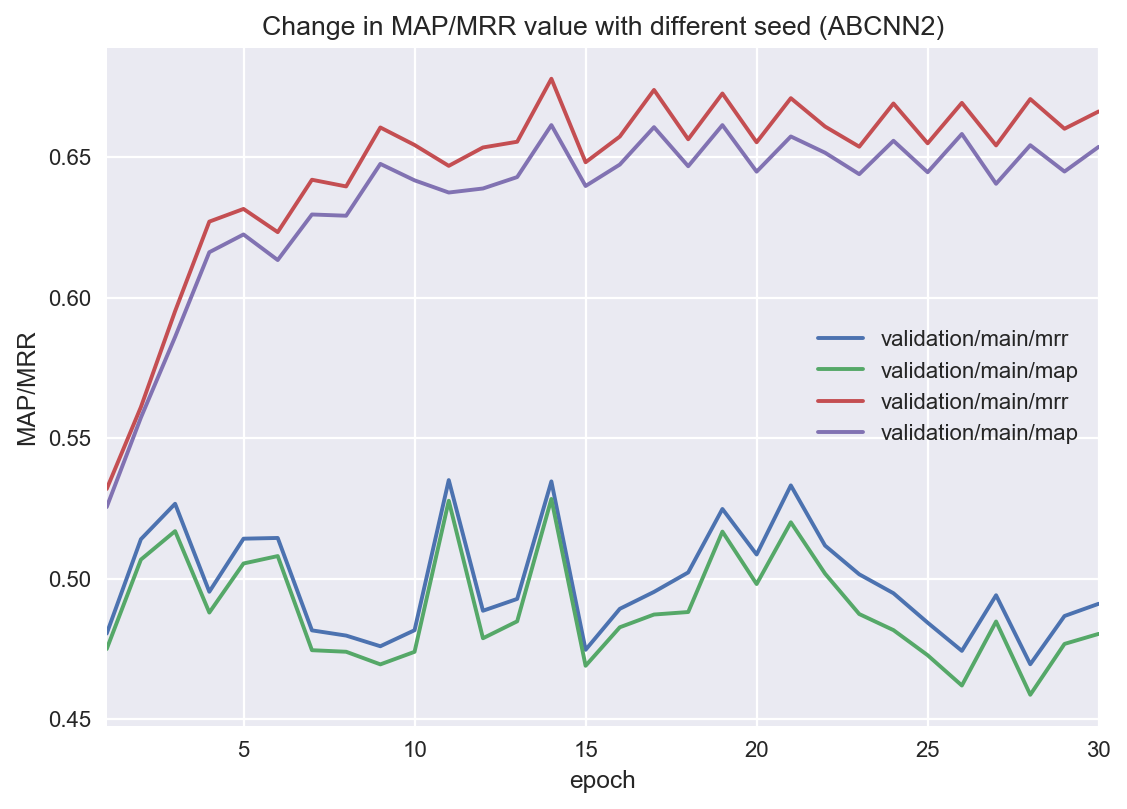

In [26]:
ax = bad[["validation/main/mrr", "validation/main/map"]].plot()
good[["validation/main/mrr", "validation/main/map"]].plot(ax=ax)
plt.title("Change in MAP/MRR value with different seed (ABCNN2)")
#good[["main/loss", "validation/main/loss"]].plot(ax=ax)
plt.xlabel('epoch')
plt.ylabel('MAP/MRR')
plt.show()

In [27]:

good

,elapsed_time,iteration,main/accuracy,main/loss,validation/main/loss,validation/main/map,validation/main/mrr,validation/main/svm_map,validation/main/svm_mrr
epoch,,,,,,,,,
1,272.173729,637,0.937794,0.281642,0.600548,0.525446,0.531883,0.597198,0.609024
2,603.402558,1273,0.948899,0.190719,0.591049,0.557295,0.561032,0.603491,0.613579
3,936.200124,1909,0.948752,0.189052,0.545619,0.585997,0.595162,0.512096,0.518930
4,1267.852750,2545,0.948949,0.187059,0.564983,0.616128,0.627020,0.622652,0.633606
5,1600.161851,3182,0.949029,0.185178,0.542327,0.622452,0.631534,0.620805,0.637460
6,1928.550311,3818,0.948949,0.182724,0.561531,0.613346,0.623275,0.574605,0.590141
7,2253.680969,4454,0.948899,0.180266,0.518907,0.629560,0.641916,0.636636,0.649780
8,2583.095886,5090,0.948899,0.178517,0.511569,0.629113,0.639538,0.642037,0.655560
9,2909.091334,5727,0.948931,0.176361,0.507441,0.647557,0.660514,0.575186,0.590131
